In [7]:
import requests
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import pmdarima as pm

In [14]:
data = pd.read_csv('BTC-USD_2.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [15]:
Date1 = data['Date']
Price = data['Open']
new_data = []
new_data.append(pd.DataFrame({'Date':Date1,
                              'Price': Price
                              }))
new_data_df = pd.concat(new_data)
new_data_df.head()

,Date,Price
0,2015-01-01,320.434998
1,2015-01-02,314.079010
2,2015-01-03,314.846008
3,2015-01-04,281.145996
4,2015-01-05,265.084015


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3034 entries, 0 to 3033
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3034 non-null   object 
 1   Price   3034 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.5+ KB


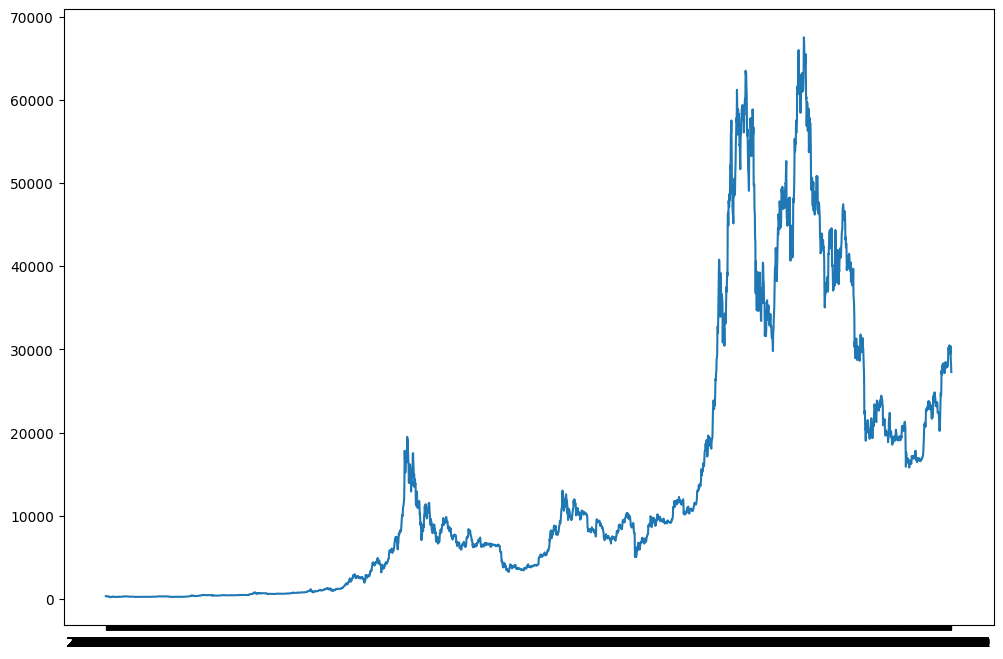

In [17]:
new_data_df.dropna(inplace=True)
new_data_df.info()
fig, ax = plt.subplots(figsize=(12,8), dpi=100)
ax.plot(new_data_df['Date'], (new_data_df['Price']))

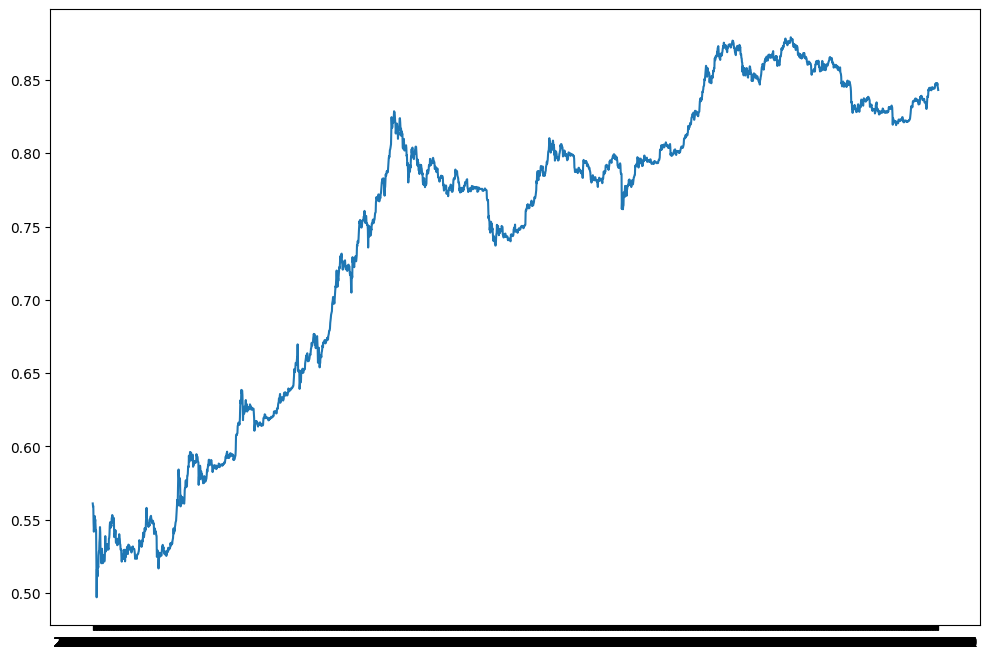

In [20]:
new_data_df['Price'] = np.log(new_data_df['Price'])

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
ax.plot(new_data_df['Date'], (new_data_df['Price']))

In [21]:
def adf_test(target_series):
   result = adfuller(target_series)
   adf_statistic = result[0]
   p_value = result[1]
   print('ADF Statistic: %f' % adf_statistic)
   print('p-value: %f' % p_value)
   return adf_statistic, p_value

def kpss_test(target_series):
   print( "Results of KPSS Test:")
   kpsstest = kpss(target_series, regression="ct", nlags="auto")
   kpss_output = pd.Series(
       kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"])
   for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
   print(kpss_output)
# get adf statistic and p-value of ADF test
adf_statistic, p_value = adf_test(new_data_df['Price'])
# get p-value for kpss
kpss_test(new_data_df['Price'])


ADF Statistic: -1.728299
p-value: 0.416594
Results of KPSS Test:
Test Statistic            1.556748
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [35]:
new_data_df['Price_dif'] = new_data_df['Price'].diff()
new_data_df

,Date,Price,Price_dif
0,2015-01-01,0.561110,NaN
1,2015-01-02,0.559123,-0.001987
2,2015-01-03,0.559366,0.000242
3,2015-01-04,0.547939,-0.011427
4,2015-01-05,0.541857,-0.006082
...,...,...,...
3029,2023-04-18,0.846389,-0.001209
3030,2023-04-19,0.847703,0.001314
3031,2023-04-20,0.845493,-0.002210
3032,2023-04-21,0.844650,-0.000843


In [36]:
new_data_df.dropna(inplace = True)


In [37]:
new_data_df

,Date,Price,Price_dif
1,2015-01-02,0.559123,-0.001987
2,2015-01-03,0.559366,0.000242
3,2015-01-04,0.547939,-0.011427
4,2015-01-05,0.541857,-0.006082
5,2015-01-06,0.545520,0.003662
...,...,...,...
3029,2023-04-18,0.846389,-0.001209
3030,2023-04-19,0.847703,0.001314
3031,2023-04-20,0.845493,-0.002210
3032,2023-04-21,0.844650,-0.000843


In [40]:
def adf_test(target_series):
   result = adfuller(target_series)
   adf_statistic = result[0]
   p_value = result[1]
   print('ADF Statistic: %f' % adf_statistic)
   print('p-value: %f' % p_value)
   return adf_statistic, p_value

def kpss_test(target_series):
   print( "Results of KPSS Test:")
   kpsstest = kpss(target_series, regression="ct", nlags="auto")
   kpss_output = pd.Series(
       kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"])
   for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
   print(kpss_output)
# get adf statistic and p-value of ADF test
adf_statistic, p_value = adf_test(new_data_df['Price_dif'])
# get p-value for kpss
kpss_test(new_data_df['Price_dif'])

ADF Statistic: -17.256999
p-value: 0.000000
Results of KPSS Test:
Test Statistic           0.080701
p-value                  0.100000
Lags Used                1.000000
Critical Value (10%)     0.119000
Critical Value (5%)      0.146000
Critical Value (2.5%)    0.176000
Critical Value (1%)      0.216000
dtype: float64


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


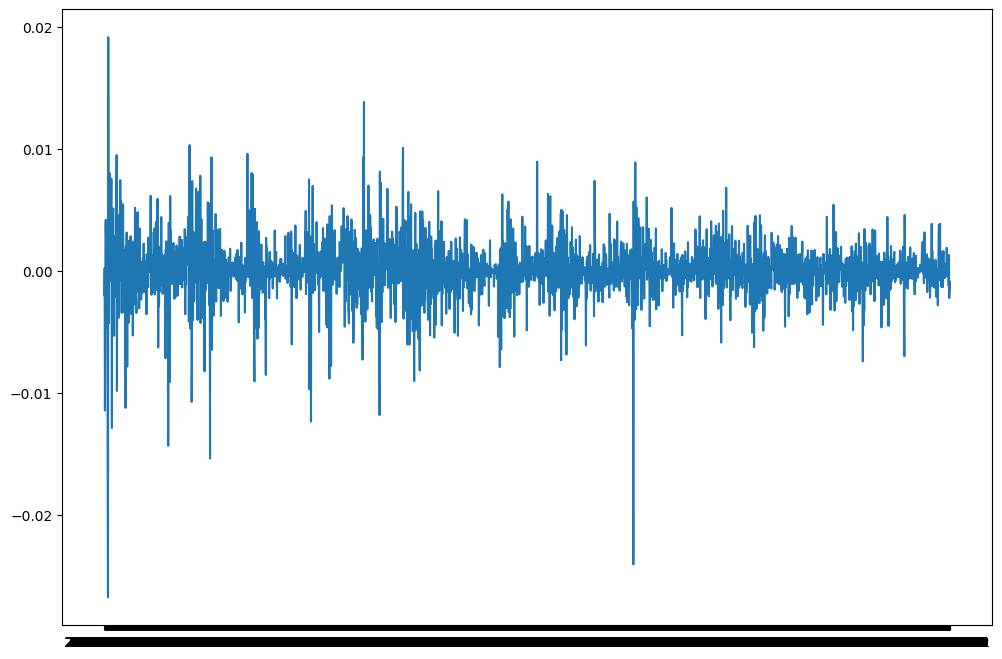

In [41]:
fig, ax = plt.subplots(figsize=(12,8), dpi=100)
ax.plot(new_data_df['Date'], (new_data_df['Price_dif']))

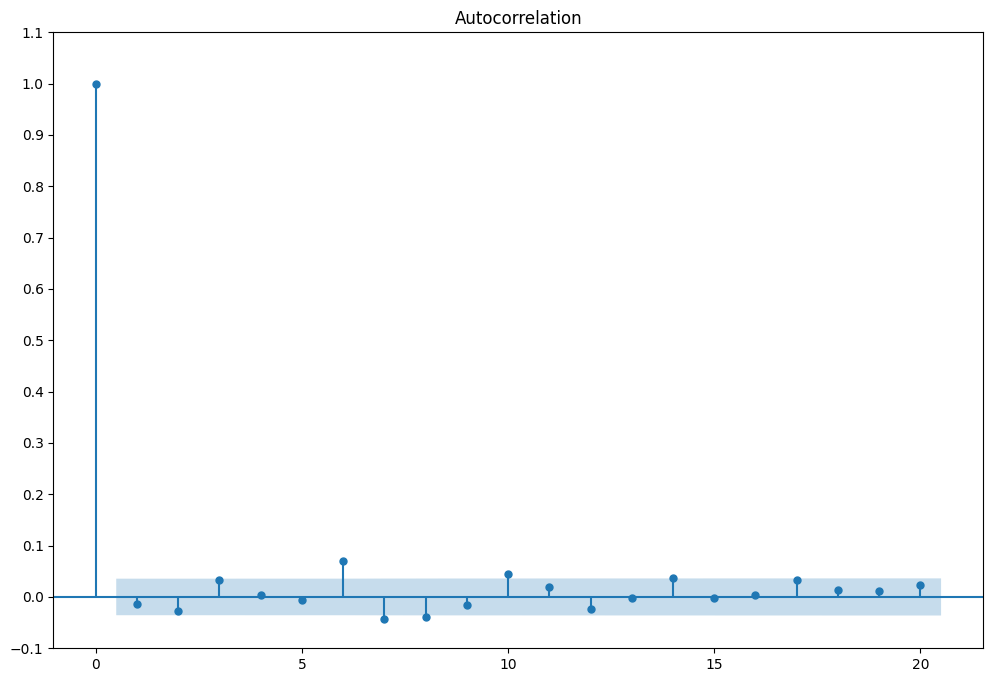

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


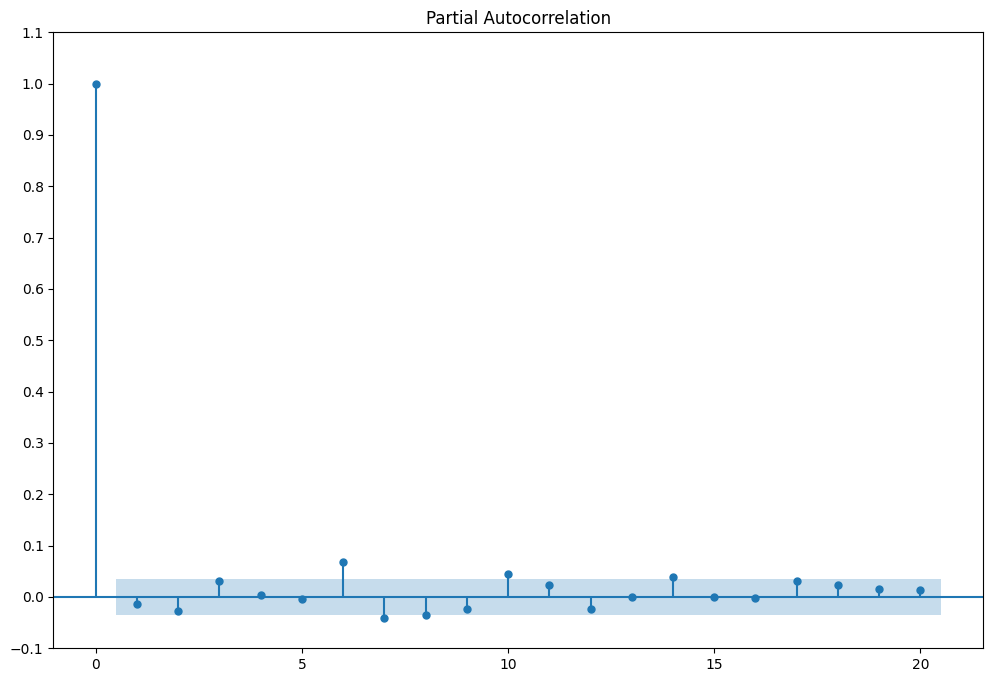

In [42]:
fig, ax = plt.subplots(1, figsize=(12,8), dpi=100)
plot_acf(new_data_df['Price_dif'], lags=20, ax=ax)
plt.ylim([-0.05, 0.25])
plt.yticks(np.arange(-0.10,1.1,0.1))
plt.show()

fig, ax = plt.subplots(1, figsize=(12,8), dpi=100)
plot_pacf(new_data_df['Price_dif'], lags=20, ax=ax)
plt.ylim([-0.05, 0.25])
plt.yticks(np.arange(-0.10,1.1,0.1))
plt.show()

In [43]:
sm.stats.acorr_ljungbox(new_data_df['Price_dif'], lags=[20], return_df=True)

,lb_stat,lb_pvalue
20,50.635457,0.00018


In [45]:
data = pd.read_csv('BTC-USD_2.csv')

Date1 = data['Date']
Price = data['Open']
new = []
new.append(pd.DataFrame({'Date':Date1,
                              'Price': Price
                              }))
new_dat = pd.concat(new)
new_dat.head()

,Date,Price
0,2015-01-01,320.434998
1,2015-01-02,314.079010
2,2015-01-03,314.846008
3,2015-01-04,281.145996
4,2015-01-05,265.084015


In [47]:
def auto_arima(new_dat):
    new_dat = np.log(new_dat['Price'])
    model = pm.auto_arima(new_dat,
                          start_p=10,
                          start_q=10,
                          test='adf',
                          max_p=10, 
                          max_q=10, 
                          m=1,
                          d=None,           
                          seasonal=False,   
                          D=0, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True,
                         stepwise = True)
    # difference df by d found by auto arima
    differenced_by_auto_arima = new_dat.diff(model.order[1])
    return model.order, differenced_by_auto_arima, model.resid()

model_order, differenced_data, model_residuals = auto_arima(new_dat)

Performing stepwise search to minimize aic
 ARIMA(10,1,10)(0,0,0)[0] intercept   : AIC=-11165.417, Time=23.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11178.446, Time=0.53 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11177.579, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11177.544, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11176.009, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11175.685, Time=0.73 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 26.187 seconds


In [48]:
sm.stats.acorr_ljungbox(model_residuals, lags=[20], return_df=True)

,lb_stat,lb_pvalue
20,10.258422,0.96324


In [49]:
import pandas as pd
import json
import pmdarima as pm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import datetime

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


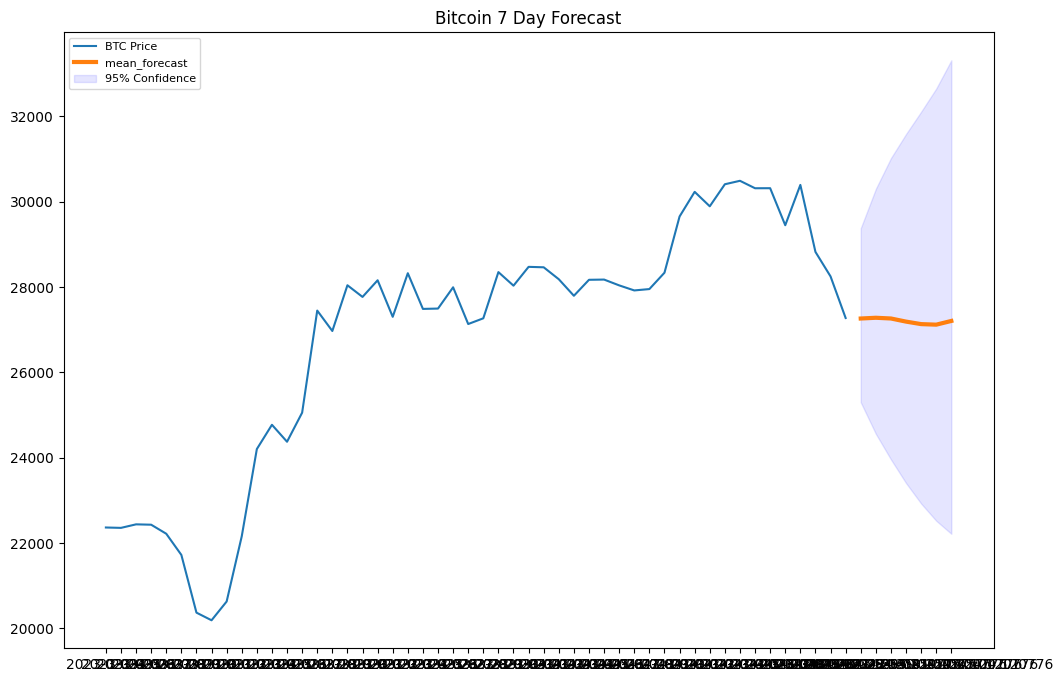

In [56]:
model = sm.tsa.arima.ARIMA(np.log(new_dat['Price']), order = (10,1,10))
fitted = model.fit()
fc = fitted.get_forecast(7)
 
#Set confidence to 95% 
fc = (fc.summary_frame(alpha=0.05))
#Get mean forecast
fc_mean = fc['mean']
#Get lower confidence forecast
fc_lower = fc['mean_ci_lower']
#Get upper confidence forecast
fc_upper = fc['mean_ci_upper'] 
#Set figure size
plt.figure(figsize=(12,8), dpi=100)
#Plot last 50 price movements
plt.plot(new_dat['Date'][-50:],new_dat['Price'][-50:], label='BTC Price')
# create date axis for predictions
future_7_days =  [str(datetime.datetime.today() + datetime.timedelta(days=x)) for x in range(7)]
#Plot mean forecas
plt.plot(future_7_days, np.exp(fc_mean), label='mean_forecast', linewidth = 3)
#Create confidence interval
plt.fill_between(future_7_days, np.exp(fc_lower),np.exp(fc_upper), color='b', alpha=.1, label = '95% Confidence')
#Set title
plt.title('Bitcoin 7 Day Forecast')
#Set legend
plt.legend(loc='upper left', fontsize=8)
plt.show()

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


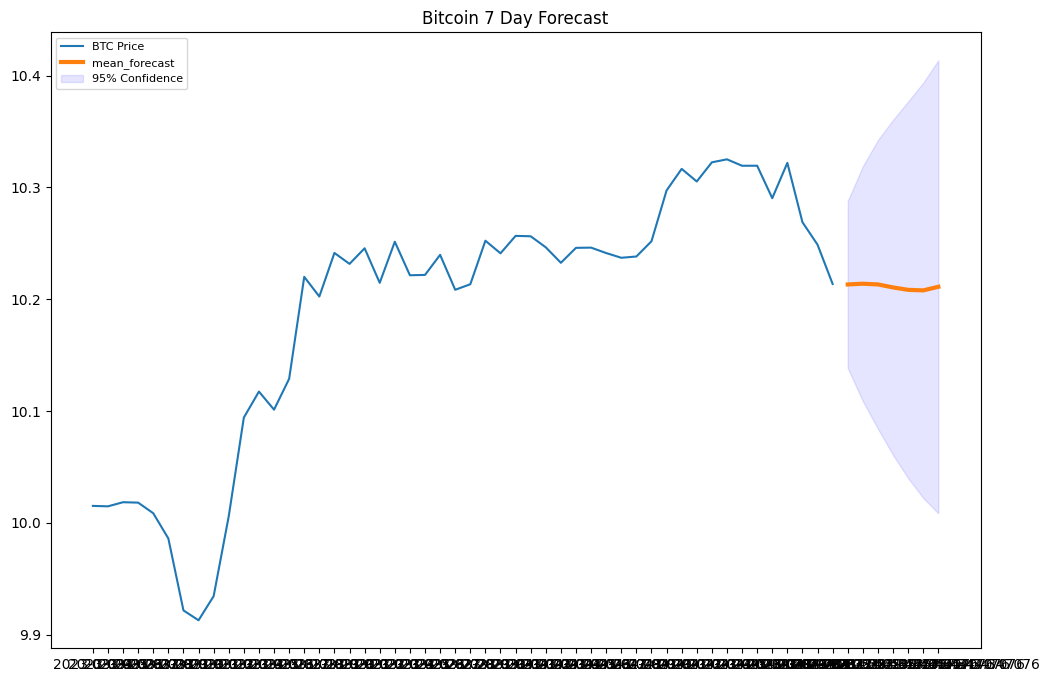

In [54]:
model = sm.tsa.arima.ARIMA(np.log(new_dat['Price']), order = (10,1,10))
fitted = model.fit()
fc = fitted.get_forecast(7)
 
#Set confidence to 95% 
fc = (fc.summary_frame(alpha=0.05))
#Get mean forecast
fc_mean = fc['mean']
#Get lower confidence forecast
fc_lower = fc['mean_ci_lower']
#Get upper confidence forecast
fc_upper = fc['mean_ci_upper'] 
#Set figure size
plt.figure(figsize=(12,8), dpi=100)
#Plot last 50 price movements
plt.plot(new_dat['Date'][-50:],np.log(new_dat['Price'][-50:]), label='BTC Price')
# create date axis for predictions
future_7_days =  [str(datetime.datetime.today() + datetime.timedelta(days=x)) for x in range(7)]
#Plot mean forecas
plt.plot(future_7_days, fc_mean, label='mean_forecast', linewidth = 3)
#Create confidence interval
plt.fill_between(future_7_days, fc_lower,fc_upper, color='b', alpha=.1, label = '95% Confidence')
#Set title
plt.title('Bitcoin 7 Day Forecast')
#Set legend
plt.legend(loc='upper left', fontsize=8)
plt.show()